In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings

warnings.filterwarnings('ignore')

In [8]:
# Función para cargar y describir los datos
def cargar_datos(Mall_Customers):
    data = pd.read_csv('Mall_Customers.csv')
    print("Descripción de los datos:\n", data.describe())
    print("\nInformación de los datos:\n")
    data.info()
    return data

In [9]:
# Función para análisis exploratorio inicial
def analizar_datos(data):
    print("\nValores nulos por columna:\n", data.isnull().sum())
    
    # Visualización de outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data['Annual Income (k$)'])
    plt.title('Boxplot: Ingreso Anual')
    plt.show()

    # Identificación de outliers
    nivel_minimo, nivel_maximo = 0, 100
    total_outliers = ((data['Annual Income (k$)'] < nivel_minimo) | (data['Annual Income (k$)'] > nivel_maximo)).sum()
    print(f"Total de datos atípicos: {total_outliers}")
    
    # Filtrar datos sin outliers
    data_filtrado = data[(data['Annual Income (k$)'] >= nivel_minimo) & (data['Annual Income (k$)'] <= nivel_maximo)]
    return data_filtrado


In [13]:
# Función para preprocesamiento de datos
def preprocesar_datos(data):
    # Selección de características relevantes
    selected_data = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    
    # Transformación de género
    selected_data['Gender'] = selected_data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    return selected_data

In [14]:
# Función para visualización inicial
def visualizar_datos(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Gender'], palette='viridis')
    plt.title('Ingreso Anual vs Puntuación de Gasto por Género')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Puntuación de Gasto (1-100)')
    plt.legend(title='Género', loc='upper left')
    plt.show()


In [15]:
# Función para clustering jerárquico y evaluación
def clustering_jerarquico(data, n_clusters=3):
    # Escalar datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    
    # Dendrograma
    linked = linkage(scaled_data, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title('Dendrograma para Clustering Jerárquico')
    plt.xlabel('Muestras')
    plt.ylabel('Distancia')
    plt.show()

    # Modelo de clustering
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(scaled_data)

    # Evaluación del modelo
    sil_score = silhouette_score(scaled_data, labels)
    ch_score = calinski_harabasz_score(scaled_data, labels)
    db_score = davies_bouldin_score(scaled_data, labels)
    print(f"Coeficiente de Silhouette: {sil_score:.2f}")
    print(f"Índice de Calinski-Harabasz: {ch_score:.2f}")
    print(f"Índice de Davies-Bouldin: {db_score:.2f}")
    
    return labels, scaled_data

In [4]:
# Función para visualización de resultados
def visualizar_resultados(data, labels, scaled_data):
    data['Cluster'] = labels
    
    # Gráfico de dispersión
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
    plt.title('Clusters Identificados')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Puntuación de Gasto (1-100)')
    plt.colorbar(label='Cluster')
    plt.show()

    # Gráfico de silueta
    silhouette_avg = silhouette_score(scaled_data, labels)
    sample_silhouette_values = silhouette_samples(scaled_data, labels)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    y_lower = 10
    for i in range(len(np.unique(labels))):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title("Gráfico de Silueta")
    ax.set_xlabel("Coeficiente de Silueta")
    ax.set_ylabel("ID de Muestra")
    plt.show()


Descripción de los datos:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Información de los datos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender        

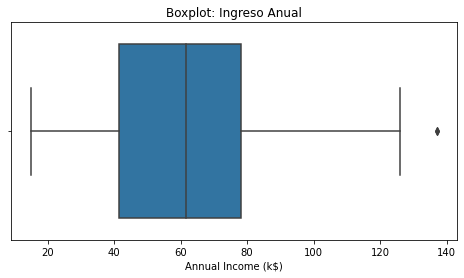

Total de datos atípicos: 14


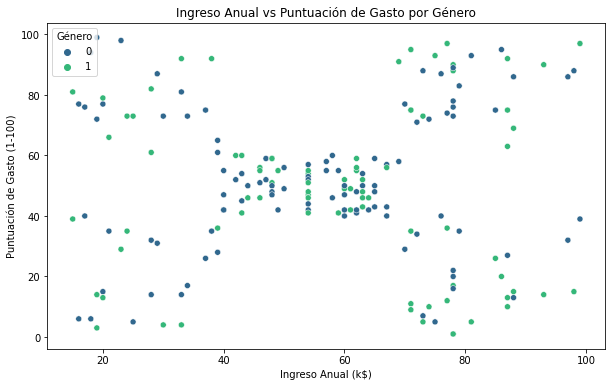

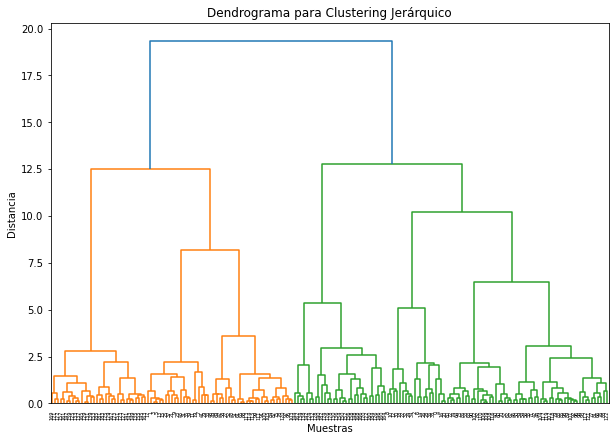

Coeficiente de Silhouette: 0.33
Índice de Calinski-Harabasz: 84.90
Índice de Davies-Bouldin: 1.13


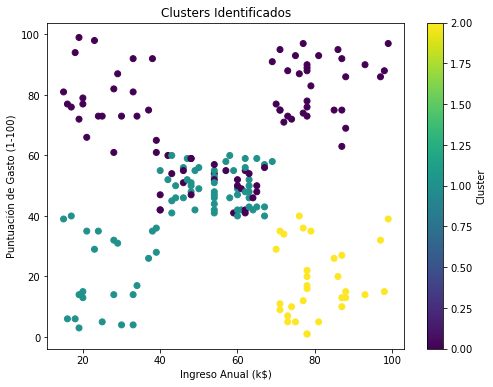

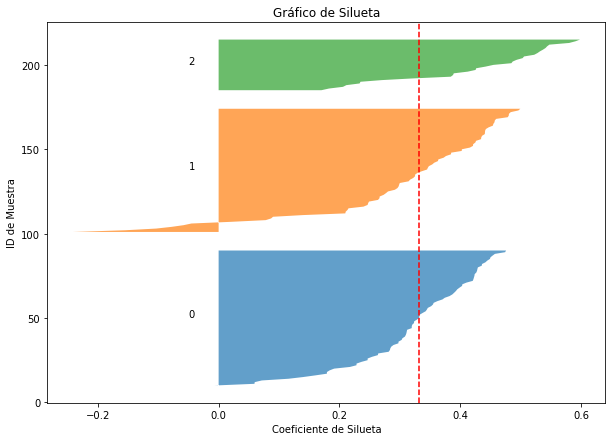

In [16]:
# Main script
if __name__ == "__main__":
    # Cargar datos
    file_path = 'Mall_Customers.csv'
    data = cargar_datos(file_path)

    # Análisis exploratorio
    data = analizar_datos(data)

    # Preprocesamiento
    data = preprocesar_datos(data)
    visualizar_datos(data)

    # Clustering
    labels, scaled_data = clustering_jerarquico(data)

    # Visualización de resultados
    visualizar_resultados(data, labels, scaled_data)